# Polynomial Regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [5]:
# Create a test dataset
X = 6 * np.random.rand(200, 1)-3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200,1)

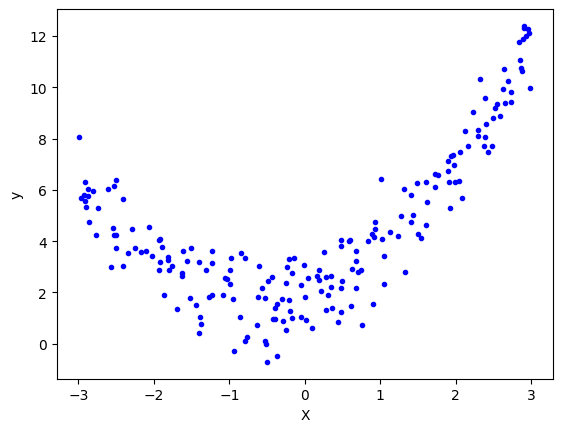

In [8]:
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [9]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)


In [13]:
# Apply Linear Regression model

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = lr.predict(X_test)
r2_score_lr = r2_score(y_test, y_pred)
print('R2-score = ', r2_score_lr)

R2-score =  0.4469063252708634


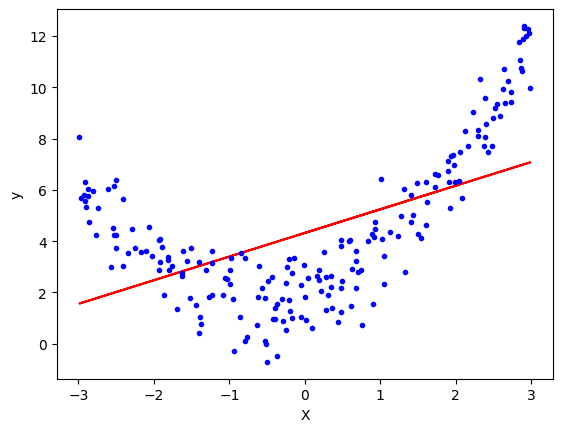

In [ ]:
# Demonstrates a low R2 score because we're finding a linear best fit on a polynomial data set

plt.plot(X_train, lr.predict(X_train), color='red')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
# polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trans = poly.fit_transform(X_train) # training data uses fit_transform() because it goes through the model
X_test_trans = poly.transform(X_test) # test data is just transform()

In [19]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test, y_pred)

# much better r2-score than simple linear regression

0.9129397320431812

In [22]:
print(lr.coef_)

[[0.         0.89980561 0.77774516]]


In [23]:
print(lr.intercept_)

[2.03382523]


In [28]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

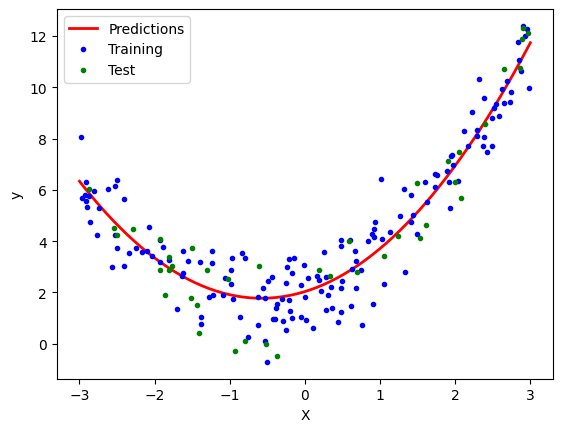

In [29]:
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'b.', label='Training')
plt.plot(X_test, y_test, 'g.', label='Test')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [30]:
poly.powers_

array([[0],
       [1],
       [2]])

## 3D polynomial regression plot

In [31]:
x = 7*np.random.rand(100, 1)-2.8
y = 7*np.random.rand(100, 1)-2.8
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.rand(100,1)

In [34]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z = z.ravel())
fig.show()